![nn](condition.jpg)

### Step 1. 스티커 구하기 or 만들기
### Step 2. 얼굴 검출 & 랜드마크 검출 하기
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.  

### Step 3. 스티커 적용 위치 확인하기
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.
![nn](68.jpg)
### Step 4. 스티커 적용하기  
(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.  

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요?  스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

### Step 5. 문제점 찾아보기
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

# Step 1. 스티커 구하기 or 만들기

In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


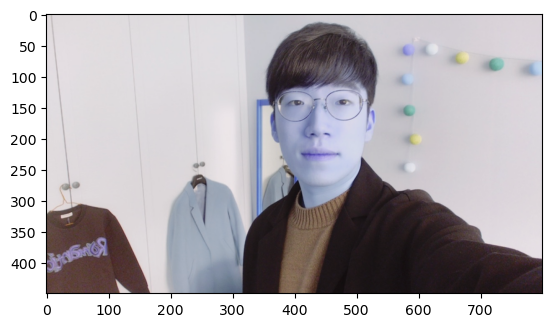

In [2]:
my_image_path = 'images/image.png' 
img_bgr = cv2.imread(my_image_path)

img_show = img_bgr.copy()  
plt.imshow(img_bgr)
plt.show()

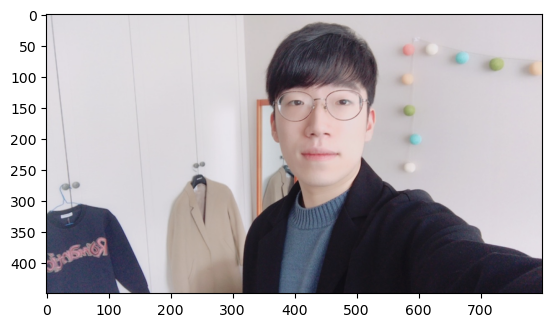

In [3]:
# cvtGolor로 bgr -> rgb
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [4]:
# hog로 바꾸기
# face_detector함수로 detector 선언하기
detector_hog = dlib.get_frontal_face_detector()
# 이미지에 detector 적용
dlib_rects = detector_hog(img_rgb, 1) 
print(dlib_rects) 

rectangles[[(345, 98) (531, 284)]]


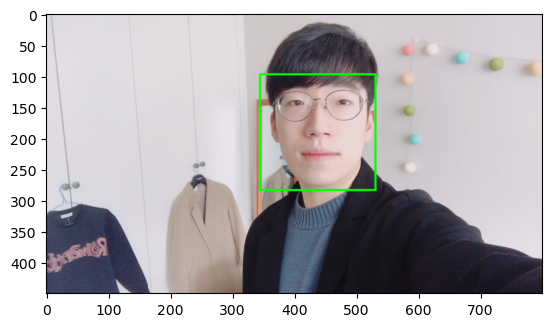

In [5]:
# 사각형 치기
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
# 이목구비 detector 선언
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


In [7]:
# 위에는 rects를 for문돌려 얼굴좌표를 찾아 rect로 받았고,
# 이번에는 rects를 for문돌려 이목구비 각 구성요소의 위치 좌표(points)를 찾아 
# 그 벡터값을 list_points 변수로 받아 list_landmarks 리스트에 append.

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(list_landmarks[0])
print(len(list_landmarks[0]))

[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]
68


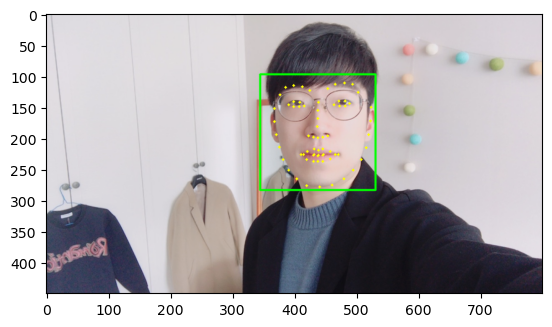

In [8]:
# 포인트 표시하기
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255),-1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Step 4. 스티커 적용하기

(438, 200)
(x,y) : (438,200)
(w,h) : (187,187)
(187, 187, 3)
(refined_x,refined_y) : (345,107)


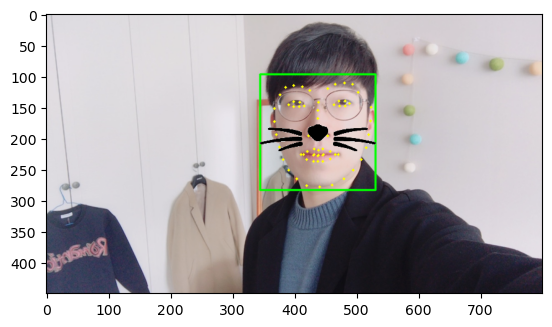

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0]
    y = landmark[33][1] 
    w = h = dlib_rect.width() 
       
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

sticker_path = 'images/cat-whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인  
  
refined_x = x-w//2
refined_y = y-h//2    
print (f'(refined_x,refined_y) : ({refined_x},{refined_y})')

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()



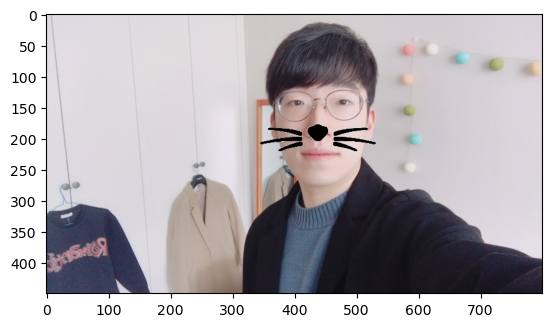

In [10]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

## (번외)  cv2.addWeighted() 사용해보기

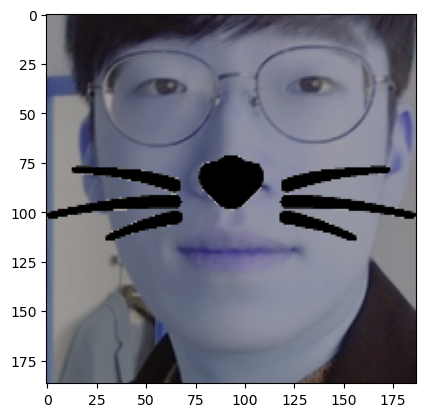

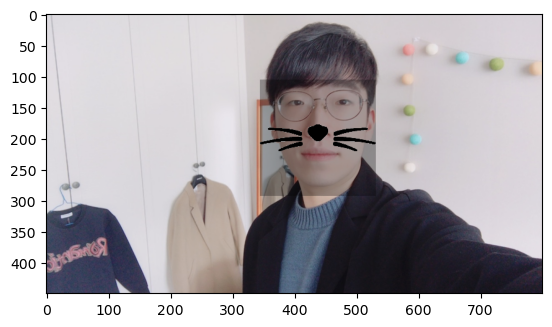

In [11]:
# addWeight로 합성하기

img_add = img_bgr.copy()
img_crop = img_add[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
#img_sticker와 size가 동일하게 잘라줌

img_sticker_select = img_sticker[:,:] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)
img_weighted = cv2.addWeighted(img_crop, 0.1, img_sticker_select, 0.6, 0.0) # 가중치를 부여함
plt.imshow(img_weighted)
plt.show()

img_add[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = img_weighted
plt.imshow(cv2.cvtColor(img_add, cv2.COLOR_BGR2RGB))
plt.show()

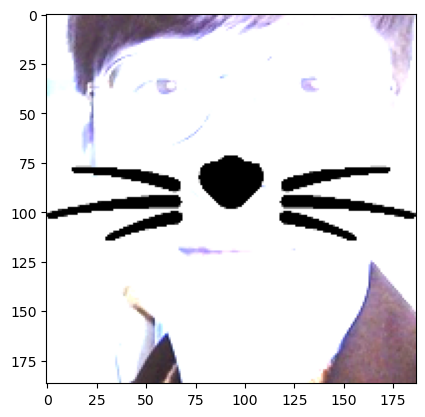

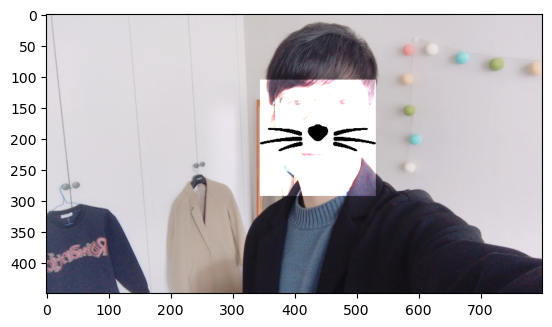

In [12]:
# addWeight로 합성하기

img_add = img_bgr.copy()
img_crop = img_add[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
#img_sticker와 size가 동일하게 잘라줌

img_sticker_select = img_sticker[:,:] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)
img_weighted = cv2.addWeighted(img_crop, 2, img_sticker_select, 0.6, 0.0) # 가중치를 부여함
plt.imshow(img_weighted)
plt.show()

img_add[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = img_weighted
plt.imshow(cv2.cvtColor(img_add, cv2.COLOR_BGR2RGB))
plt.show()

# Step 5. 문제점 찾아보기

In [13]:
def likecat(img_input):
    my_image_path = f'images/{img_input}.jpg' 
    img = cv2.imread(my_image_path)
    cv2.imwrite(f'images/{img_input}.png', img)
    img_input = cv2.imread(f'images/{img_input}.png')
    
    plt.imshow(img_input)
    plt.show()
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(img_input, 1) 
    print(dlib_rects) 
    for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽
        cv2.rectangle(img_input, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    img_show_rgb =  cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()
    
    model_path = 'models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_input, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_input, point, 2, (0, 255, 255),-1)
    img_show_rgb = cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
        print (landmark[33]) 
        x = landmark[33][0]
        y = landmark[33][1] 
        w = h = dlib_rect.width() 

    sticker_path = 'images/cat-whiskers.png' 
    img_sticker = cv2.imread(sticker_path) 
    img_sticker = cv2.resize(img_sticker, (w,h)) 
    refined_x = x-w//2
    refined_y = y-h//2    
    sticker_area = img_input[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_input[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB))
    plt.show()


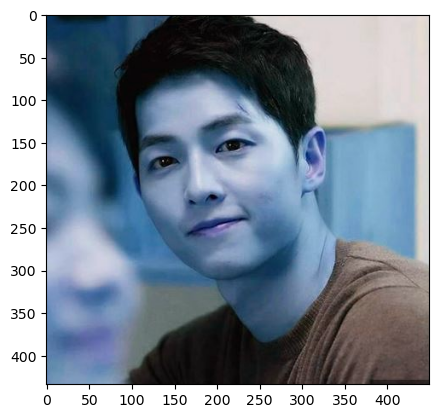

rectangles[[(68, 68) (291, 291)]]


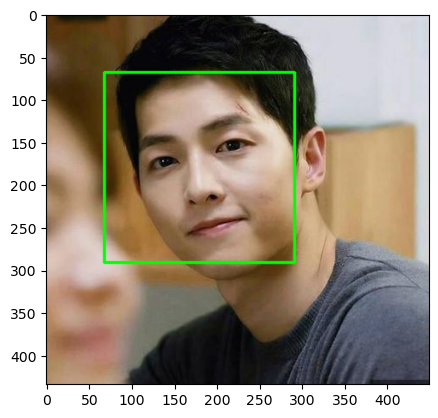

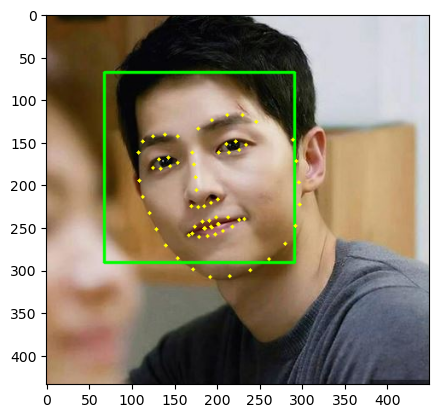

(185, 225)


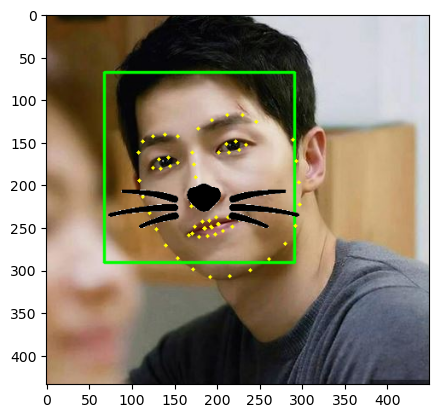

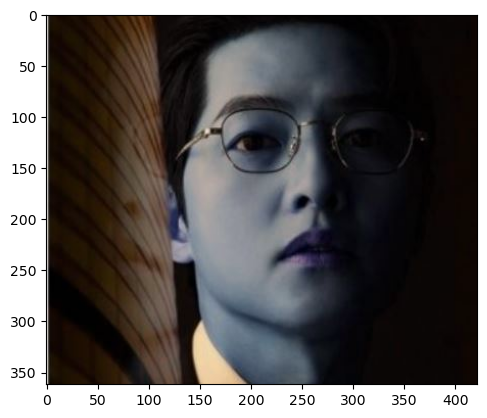

rectangles[[(142, 43) (365, 266)]]


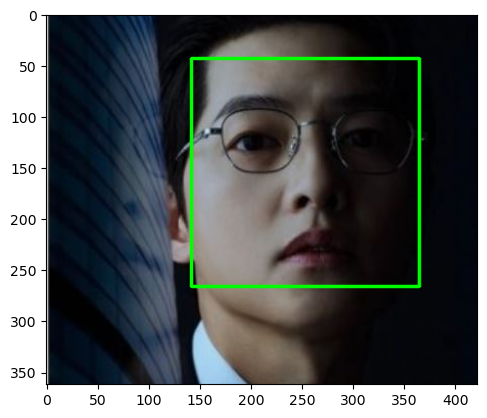

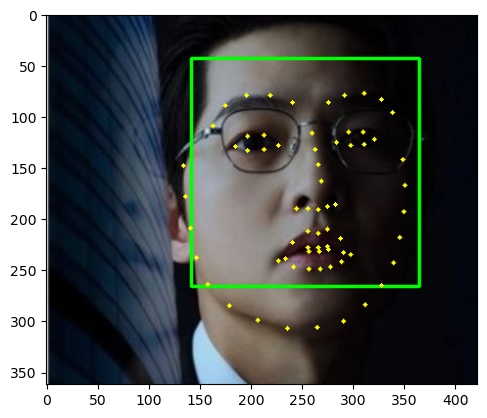

(266, 191)


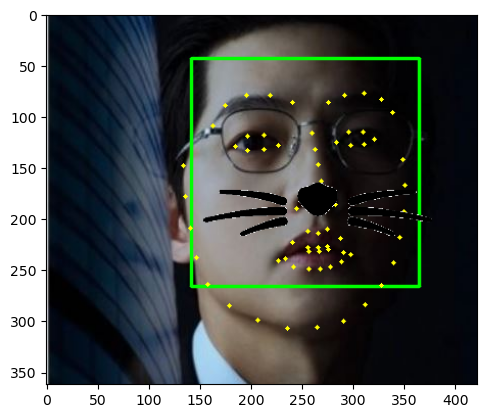

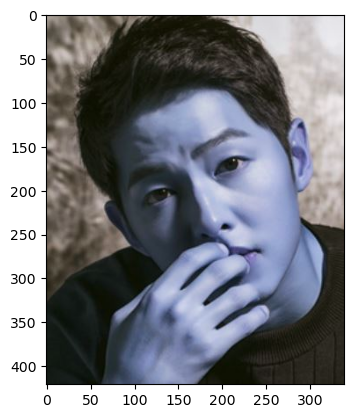

rectangles[[(68, 118) (291, 341)]]


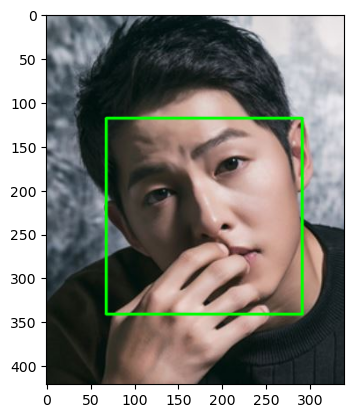

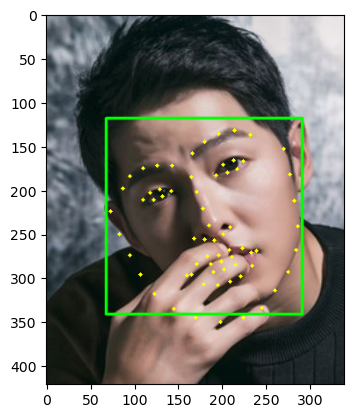

(191, 257)


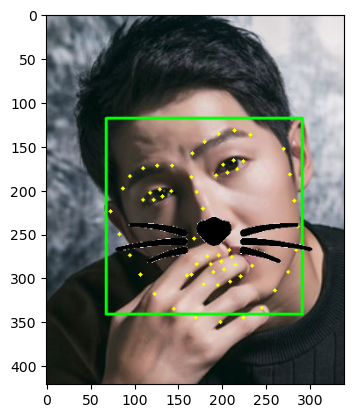

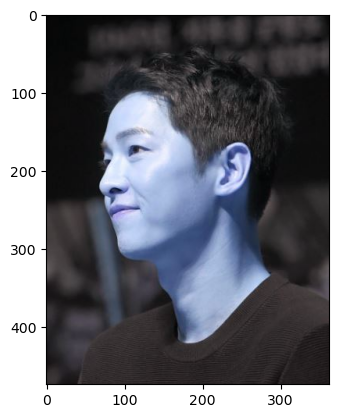

rectangles[[(29, 133) (184, 288)]]


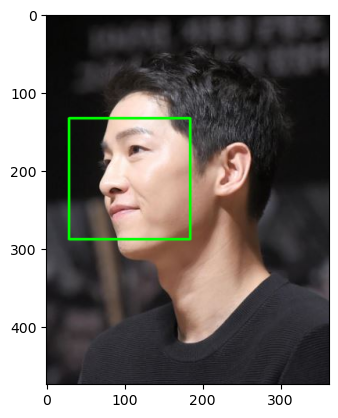

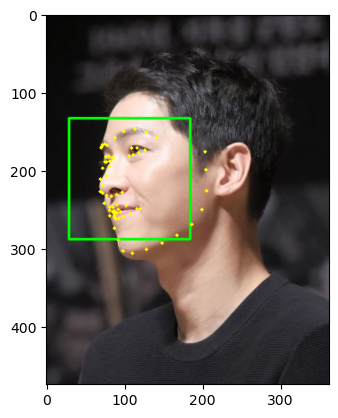

(83, 233)


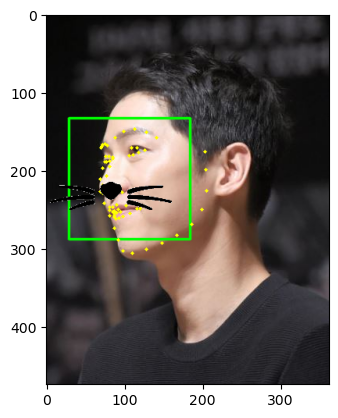

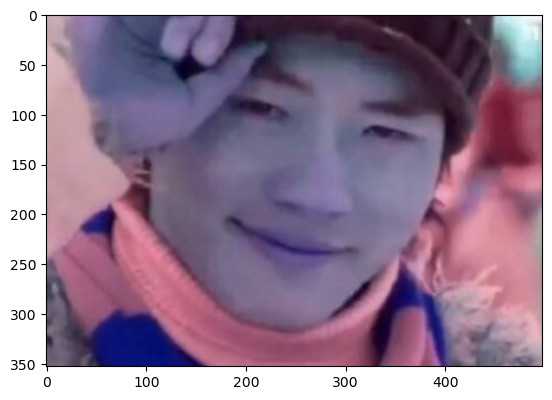

rectangles[[(141, 52) (409, 320)]]


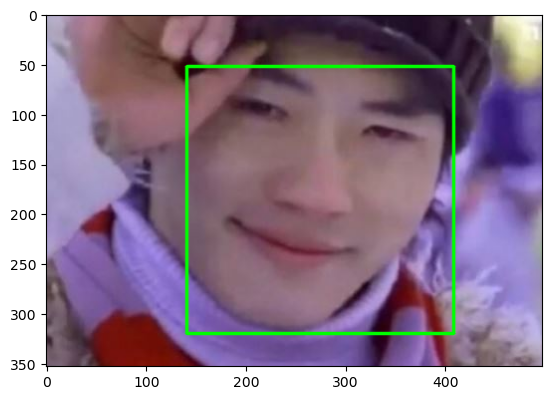

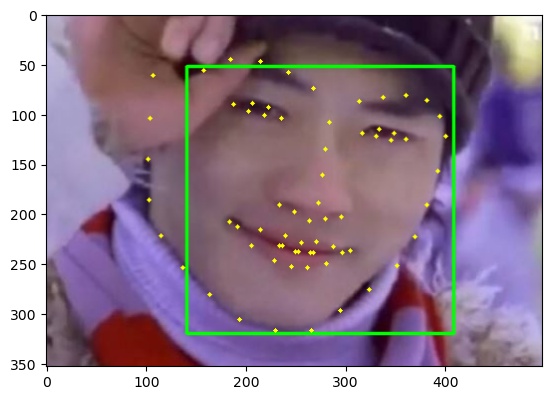

(264, 207)


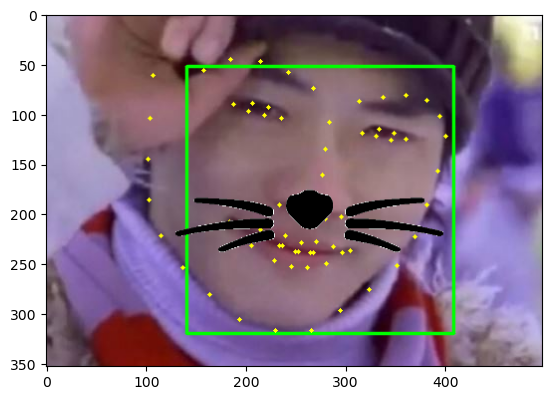

In [14]:
likecat('sjk')
likecat('sjk_dark')
likecat('sjk_hand')
likecat('sjk_side')
likecat('sora2')

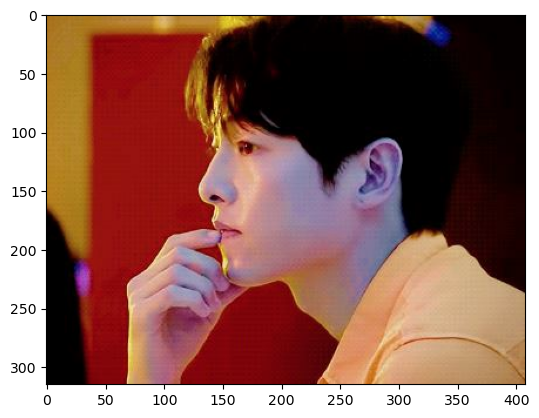

rectangles[]


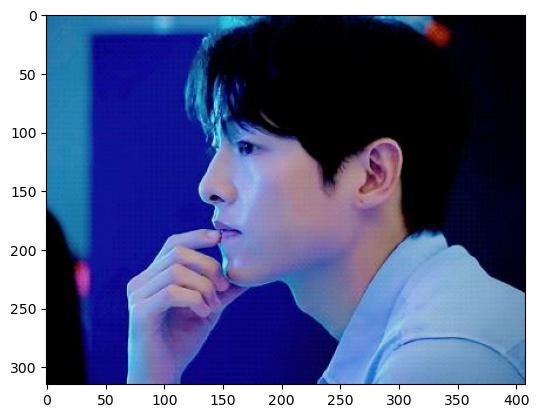

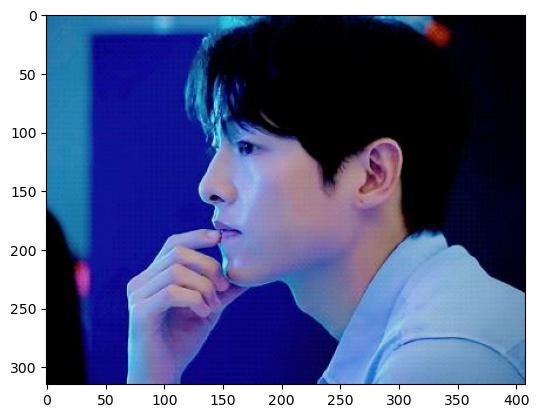

UnboundLocalError: local variable 'w' referenced before assignment

In [15]:
likecat('sjk_side2')

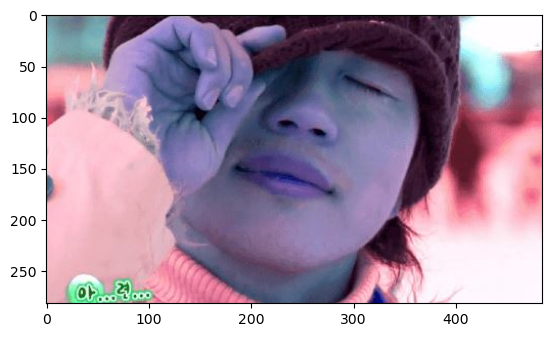

rectangles[]


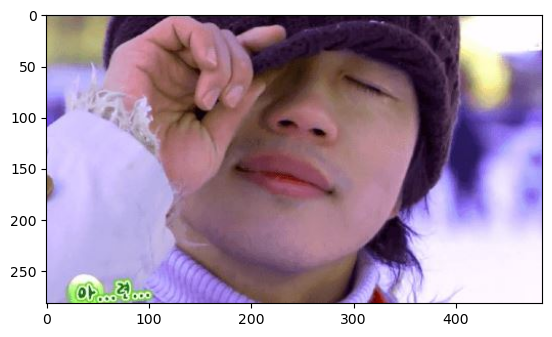

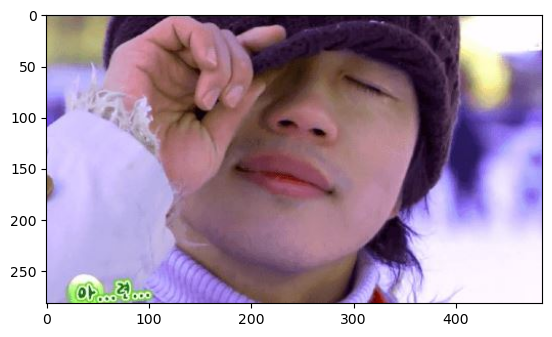

UnboundLocalError: local variable 'w' referenced before assignment

In [16]:
likecat('sora')

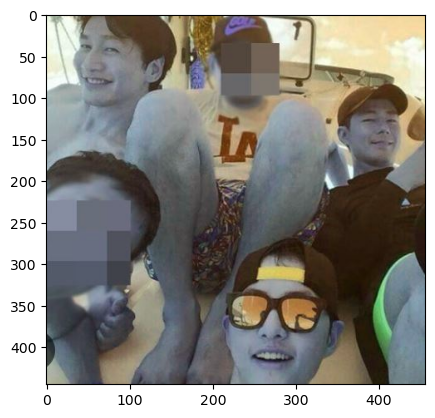

rectangles[[(370, 108) (432, 170)], [(210, 325) (339, 454)], [(16, 17) (106, 106)]]


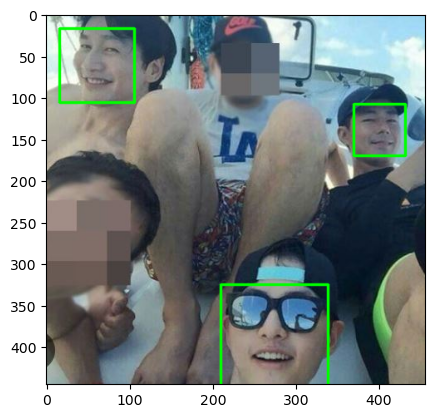

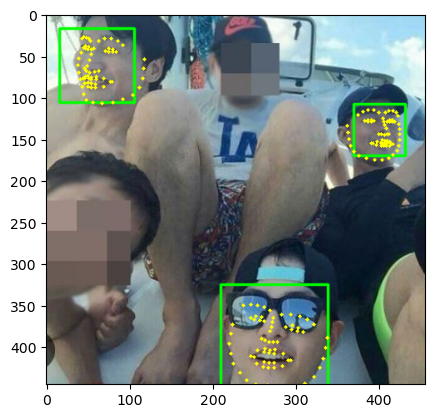

(407, 145)
(268, 394)
(52, 70)


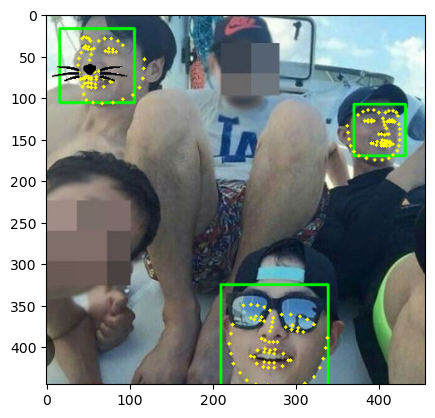

In [17]:
likecat('sjk_together')

# 회고

루브릭 3에 대한 결과 : face detection의 기능이 hog로 들어가다 보니, 사진에서의 얼굴이 색상차이가 정확히 나지 않거나, 점이 너무 몰려있거나, 각도가 맞지 않으면 인식하지 못한다.
(예시중 송중기의 엄청난 옆라인이나, 소라게 장면은 얼굴의 경계를 잡지 못해서 width 자체를 잡아내지 못해 오류가 났다. 여럿이 있는 사진에서는 선글라스를 껴도 눈과 눈썹의 위치를 파악해내기는 했지만 원거리에서 찍혀 점이 오밀조밀한 경우에는 기준 인덱스를 추출해내지 못해 스티커가 붙지 않았다,)

이를 해결하기 위해서는 영상이라면 가능할 것 같다. 한 장의 사진이 아니라 움직이는 영상에서 실시간으로 점을 잡는다면 잘 잡혔을 그 순간에 스티커를 붙일 수 있을 듯 하다. 이렇게 된다면 반응 속도는 아주 중요한 항목일 것으로 예상된다.


어려웠던 점 : 코드이해가 어려웠다. 해상도는 표기법상 가로와 세로가 바뀌는 점을 이해하는것이 어려웠고, 왕관의 위치를 잡는 과정이 어려웠다. 왼쪽 상단이 기준점이 된다는 사실을 찾아내는데까지 많은 시간이 걸렸다.



    
    